<a href="https://colab.research.google.com/github/pierrebomfim/imersao-dados-alura/blob/main/Desafios_Aula_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Desafio01: Proporção dos inscritos por idade.

Desafio02: Descobrir de quais estados são os inscritos com 13 anos.

Desafio03: Adicionar título no gráfico

Desafio04: Plotar os Histogramas das idades dos do treineiro e não treineiros.

Desafio05: Comparar as distribuições das provas em inglês espanhol

Desafio06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


**Desafio 01: Proporção dos inscritos por idade.**

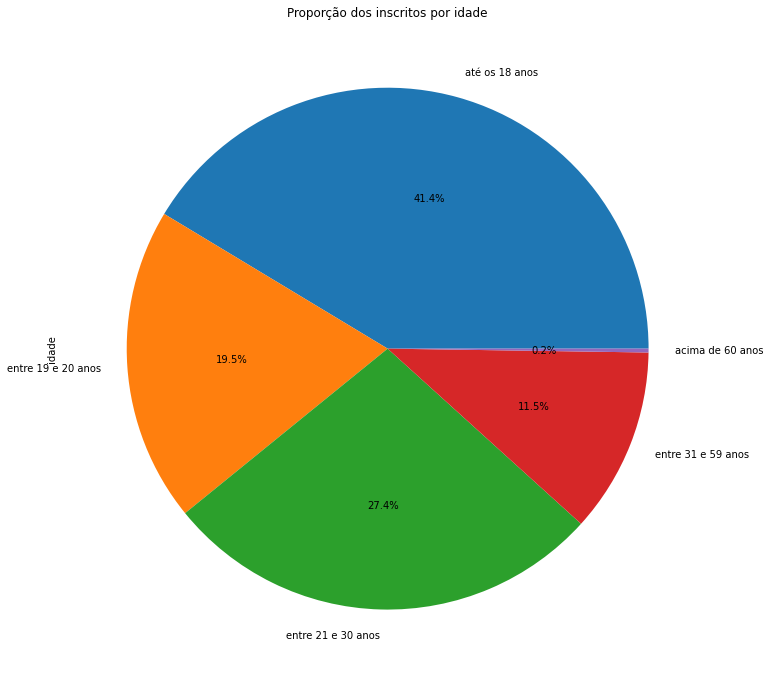

In [ ]:
total_inscritos = len(dados["NU_IDADE"])

grupo_1 = dados.query('NU_IDADE < 19')['NU_IDADE'].value_counts().sort_index()  #Inscritos com idade até os 18 anos
grupo_2 = dados.query('NU_IDADE > 18 and NU_IDADE < 21')['NU_IDADE'].value_counts().sort_index()  #Inscritos com idade entre 19 e 20 anos
grupo_3 = dados.query('NU_IDADE > 20 and NU_IDADE < 31')['NU_IDADE'].value_counts().sort_index()  #Inscritos com idade entre 21 e 30 anos
grupo_4 = dados.query('NU_IDADE > 30 and NU_IDADE < 60')['NU_IDADE'].value_counts().sort_index()  #Inscritos com idade entre 31 e 59 anos
grupo_5 = dados.query('NU_IDADE > 59')['NU_IDADE'].value_counts().sort_index()  #Inscritos com idade a partir de 60 anos

total_idade = [sum(grupo_1), sum(grupo_2), sum(grupo_3), sum(grupo_4), sum(grupo_5)]

i = 0
proporcao = []
while i < len(total_idade):
  proporcao.append( (total_idade[i] * 100) / total_inscritos )
  i = i + 1

df = pd.DataFrame(
    {
        'idade': proporcao
     }, 
     index = ['até os 18 anos', 'entre 19 e 20 anos', 'entre 21 e 30 anos', 'entre 31 e 59 anos', 'acima de 60 anos'])

df.plot.pie(title="Proporção dos inscritos por idade", legend='none', autopct='%1.1f%%', y='idade', figsize=(12,12))
plt.legend().remove()

**Desafio 02: Descobrir de quais estados são os inscritos com 13 anos.**

In [ ]:
df_estado_13anos = dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]
result = df.unique()
print(f'Os estados que tiveram inscritos com 13 anos são: {result}')


Os estados que tiveram inscritos com 13 anos são: ['SP' 'MT' 'AP' 'BA']


**Desafio 03: Adicionar título no gráfico**

Text(0, 0.5, 'nº inscritos')

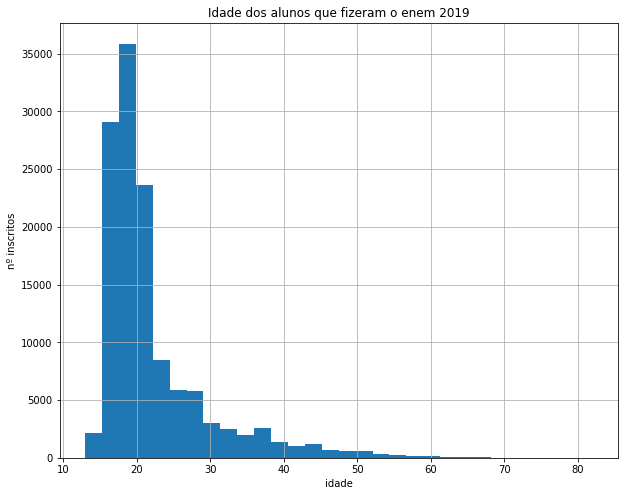

In [ ]:
dados['NU_IDADE'].hist(bins = 30, figsize = (10, 8))

plt.title("Idade dos alunos que fizeram o enem 2019")
plt.xlabel('idade')
plt.ylabel('nº inscritos')

**Desafio 04: Plotar os Histogramas das idades dos treineiros e não treineiros.**

Text(0, 0.5, 'nº inscritos')

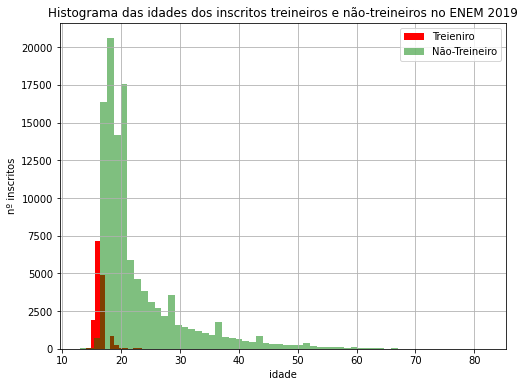

In [ ]:
treineiros = dados.query("IN_TREINEIRO == 1")
nao_treineiros = dados.query("IN_TREINEIRO != 1")

treineiros["NU_IDADE"].hist(bins=60, figsize=(8,6), color='red')
nao_treineiros["NU_IDADE"].hist(bins=60, figsize=(8,6), alpha=.5, color='green')

plt.legend(['Treieniro', 'Não-Treineiro'])
plt.title("Histograma das idades dos inscritos treineiros e não-treineiros no ENEM 2019")
plt.xlabel('idade')
plt.ylabel('nº inscritos')


**Desafio 05: Comparar as distribuições das provas em inglês espanhol**

Text(0, 0.5, 'nº inscritos')

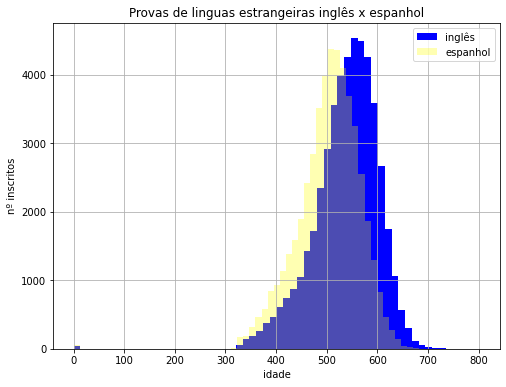

In [ ]:
ingles = dados.query("TP_LINGUA == 0")
espanhol = dados.query("TP_LINGUA != 0")

ingles["NU_NOTA_LC"].hist(bins=60, figsize=(8,6), color='blue')
espanhol["NU_NOTA_LC"].hist(bins=60, figsize=(8,6), alpha=.3, color='yellow')

plt.legend(['inglês', 'espanhol'])
plt.title("Provas de linguas estrangeiras inglês x espanhol")
plt.xlabel('idade')
plt.ylabel('nº inscritos')